In [1]:
# xmlrpc_client.ipynb

from xmlrpc.client import ServerProxy
from xmlrpc.client import Binary
import pickle


server = ServerProxy("http://localhost:8008")

print('Ping:', server.ping())

print('Server datetime:', server.now())

print('View, type, value:', server.type(2))
print('View, type, value:', server.type(2.))
print('View, type, value:', server.type('My string'))
print('View, type, value:', server.type("My string"))
print('View, type, value:', server.type([1,2,3]))
print('View, type, value:', server.type(["one", "two", "three"]))
print('View, type, value:', server.type((1,2,"3")))

print('Sum 2 + 3 :', server.sum(2, 3))
print('Pow 2^3: ', server.pow(2, 3))

Ping: True


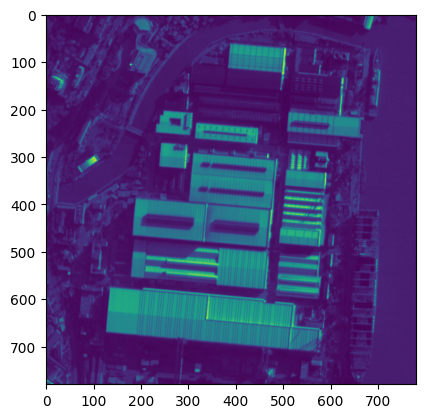

In [4]:
from PIL import Image # Работа с изображением
from pylab import * # Отображение


# Режим отображения внутри ноутбука
%matplotlib inline

# img = Image.open('Jellyfish.jpg')
img = Image.open('11.bmp')

img_arr = array(img)

# Исходное изображение
imshow(img_arr)

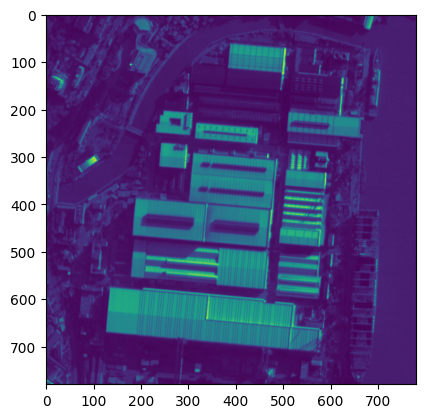

In [3]:
# Тест бинарной передачи данных
#pimg = img_arr.dumps()
pimg = pickle.dumps(img_arr) # универсально

img_bin = Binary(pimg)

img_bin2 = server.send_back_binary(img_bin)

#img_arr2 = np.loads(img_bin2.data)
img_arr2 = pickle.loads(img_bin2.data) # универсально

# Изображение после возрата с сервера
imshow(img_arr2)

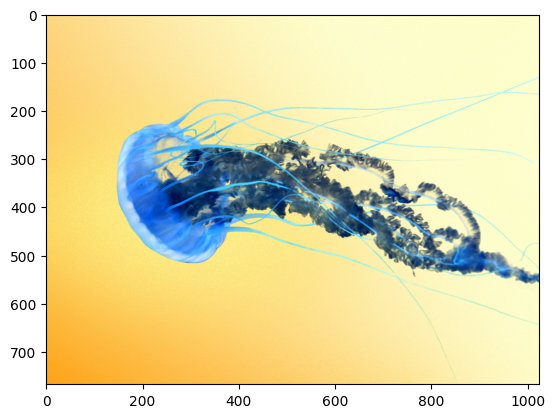

In [6]:

# Инверсия цвета изображения через сервер
def inv_color(img_arr_in):
    pimg = pickle.dumps(img_arr_in)
    img_bin = Binary(pimg)
    
    img_bin2 = server.color_inversion(img_bin)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr_inv = inv_color(img_arr)

# Изображение с инверсией цвета
imshow(img_arr_inv)

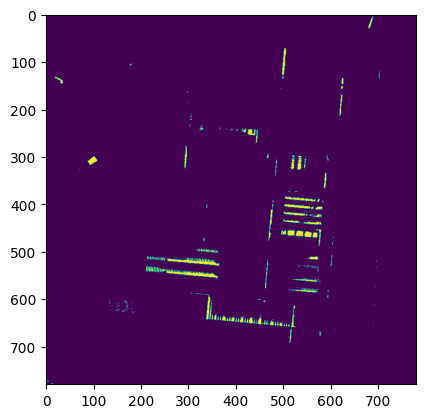

In [5]:
# Бинаризация изображения через сервер
def bin_color(img_arr_in):
    pimg = pickle.dumps(img_arr_in)
    img_bin = Binary(pimg)
    
    border = 127 # Порог бинаризации
    img_bin2 = server.binary_img(img_bin, border)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr_bin = bin_color(img_arr)

# Изображение с инверсией цвета
imshow(img_arr_bin)


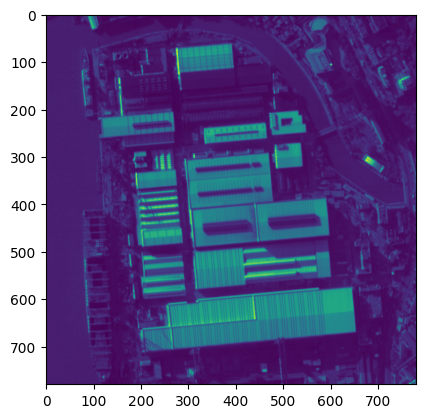

In [5]:
# Поворот относительно вертикали через сервер
def reverse(img_arr_in):
    pimg = pickle.dumps(img_arr_in)
    img_bin = Binary(pimg)
    
    img_bin2 = server.reverse(img_bin)
    
    img_arr_out = pickle.loads(img_bin2.data)
    return img_arr_out

img_arr_reverse = reverse(img_arr)

# Изображение с инверсией цвета
imshow(img_arr_reverse)

In [2]:
print(server.black_list_check('Петров', 'Петр', 'Петрович', '07.08.1985'))
print(server.black_list_check('Петров', 'Петр', 'Петрович', '07.08.1986'))
print(server.black_list_check('Примеров', 'Алексей', 'Денисович', '-'))


Петров Петр Петрович, 07.08.1985: bad_boy
Петров Петр Петрович, 07.08.1986: good_boy
Примеров Алексей Денисович, -: good_boy
